# Experiments overview

## Load dataset and calculate MOS

In [1]:
import pandas as pd

df = pd.read_csv("ratings.csv")

# group by configuration
df_grouped = df.groupby(['object', 'distance', 'frame_rate', 'encode_method', 'quantization_level_index']).qoe
stats = df_grouped.describe(percentiles=[0, 0.025, 0.05, 0.25, 0.75, 0.95, 0.975, 1])
stats = stats.reset_index()

# "mean" is the mean opinion score (MOS)
stats = stats.sort_values(['mean'])
stats

,object,distance,frame_rate,encode_method,quantization_level_index,count,mean,std,min,0%,2.5%,5%,25%,50%,75%,95%,97.5%,100%,max
100,thaidancer,near,10,V-PCC,0,102.0,1.117647,0.472912,1.0,1.0,1.000,1.0,1.0,1.0,1.0,2.0,2.000,5.0,5.0
45,dancer,near,15,V-PCC,0,102.0,1.156863,0.461275,1.0,1.0,1.000,1.0,1.0,1.0,1.0,2.0,2.000,4.0,4.0
40,dancer,near,10,V-PCC,0,102.0,1.176471,0.515344,1.0,1.0,1.000,1.0,1.0,1.0,1.0,2.0,2.000,4.0,4.0
105,thaidancer,near,15,V-PCC,0,102.0,1.186275,0.592534,1.0,1.0,1.000,1.0,1.0,1.0,1.0,2.0,2.475,5.0,5.0
115,thaidancer,near,30,V-PCC,0,102.0,1.186275,0.558116,1.0,1.0,1.000,1.0,1.0,1.0,1.0,2.0,2.475,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,dancer,near,30,V-PCC,3,102.0,4.274510,0.797978,2.0,2.0,2.525,3.0,4.0,4.0,5.0,5.0,5.000,5.0,5.0
39,dancer,medium,30,V-PCC,4,102.0,4.343137,0.838375,1.0,1.0,3.000,3.0,4.0,5.0,5.0,5.0,5.000,5.0,5.0
54,dancer,near,30,Draco,4,102.0,4.362745,0.793404,2.0,2.0,2.000,3.0,4.0,5.0,5.0,5.0,5.000,5.0,5.0
53,dancer,near,30,Draco,3,102.0,4.372549,0.743574,2.0,2.0,3.000,3.0,4.0,5.0,5.0,5.0,5.000,5.0,5.0


## Plot configurations and corresponding MOS

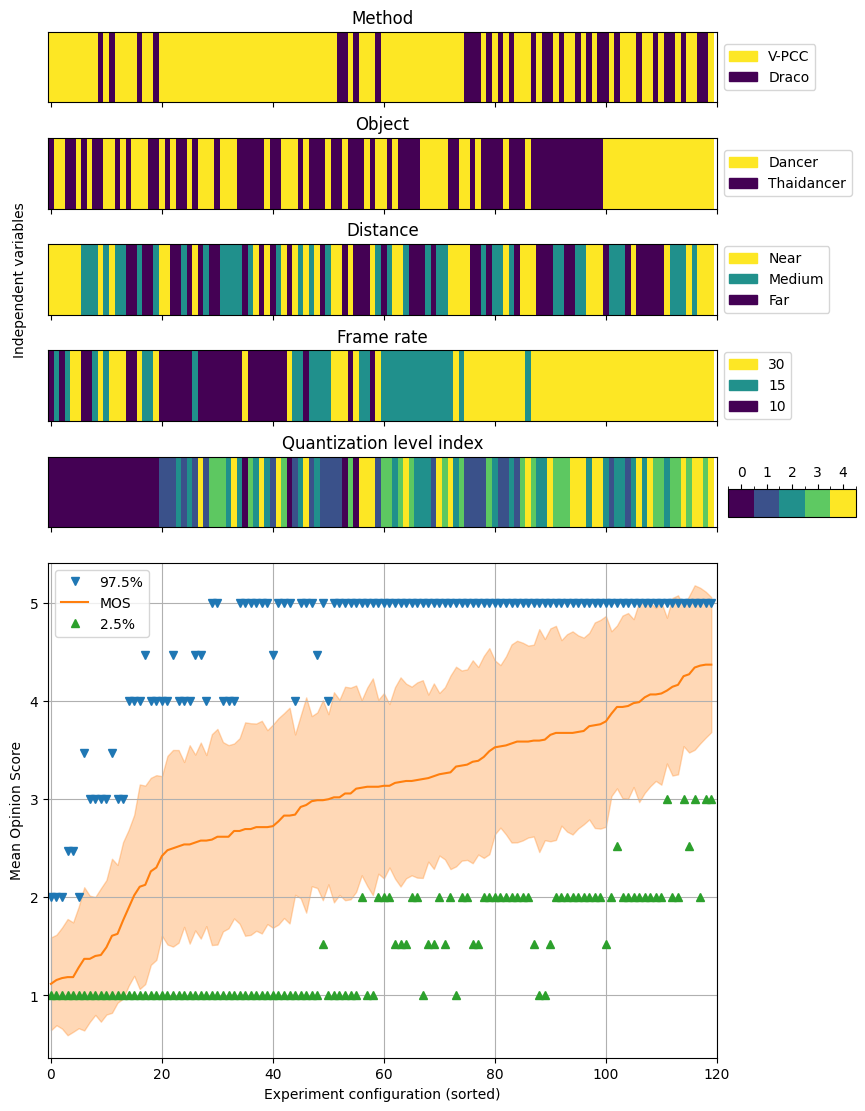

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl


def legend(ax, labels, colors):
    """
    Helper function that adds a manual legend.

    :param ax: the axis
    :param labels: the labels
    :param colors: label colors
    """
    patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
    ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))


# figure with 6 subplots: 5 images for the independent variables and the MOS plot
fig, axs = plt.subplots(6, 1, sharex='all', figsize=(8.5, 11), constrained_layout=True, gridspec_kw={'height_ratios': [1] * 5 + [7]}) #, gridspec_kw = {'hspace':0.5})
cmap = plt.get_cmap('viridis')

# current axis index count
ax_idx = 0

# method
ax = axs[ax_idx]
is_vpcc = np.expand_dims((stats["encode_method"] == 'V-PCC').to_numpy(), 1).T
ax.imshow(is_vpcc, aspect='auto', cmap=cmap)
ax.get_yaxis().set_visible(False)

ax.set_title("Method")
legend(ax, ["V-PCC", "Draco"], [cmap(1.0), cmap(0.0)])

# object
ax_idx += 1
ax = axs[ax_idx]
is_dancer = np.expand_dims((stats["object"] == 'dancer').to_numpy(), 1).T
ax.imshow(is_dancer, aspect='auto', cmap=cmap)
ax.get_yaxis().set_visible(False)

ax.set_title("Object")
legend(ax, ["Dancer", "Thaidancer"], [cmap(1.0), cmap(0.0)])

# distance
ax_idx += 1
ax = axs[ax_idx]
near = np.expand_dims((stats["distance"] == 'near').to_numpy(), 1).T
medium = np.expand_dims((stats["distance"] == 'medium').to_numpy(), 1).T
far = np.expand_dims((stats["distance"] == 'far').to_numpy(), 1).T
distance = near + medium * 0 + far * -1
ax.imshow(distance, aspect='auto', cmap=cmap)
ax.get_yaxis().set_ticks([])
# Hacky label, distance is approximately in the center
ax.set_ylabel("Independent variables", labelpad=15)

ax.set_title("Distance")
legend(ax, ["Near", "Medium", "Far"], [cmap(1.0), cmap(0.5), cmap(0.0)])

# frame rate
ax_idx += 1
ax = axs[ax_idx]
fps10 = np.expand_dims((stats["frame_rate"] == 10).to_numpy(), 1).T
fps15 = np.expand_dims((stats["frame_rate"] == 15).to_numpy(), 1).T
fps30 = np.expand_dims((stats["frame_rate"] == 30).to_numpy(), 1).T
fps = fps30 + fps15 * 0 + fps10 * -1
ax.imshow(fps, aspect='auto', cmap=cmap)
ax.get_yaxis().set_visible(False)

ax.set_title("Frame rate")
legend(ax, ["30", "15", "10"], [cmap(1.0), cmap(0.5), cmap(0.0)])

# quantization level
ax_idx += 1
ax = axs[ax_idx]
bounds = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
ncmap = mpl.colors.LinearSegmentedColormap.from_list('custom', [cmap(i / 4.0) for i in range(5)])
norm = mpl.colors.BoundaryNorm(bounds, ncmap.N)
quantization_level_index_im_input = np.expand_dims(stats["quantization_level_index"], 1).T
im = ax.imshow(quantization_level_index_im_input, aspect='auto', cmap=ncmap, norm=norm)
ax.get_yaxis().set_visible(False)

ax.set_title("Quantization level index")

# manual positioning of quantization level legend
cax = fig.add_axes([0.85, 0.535, 0.15, 0.025])
cb = mpl.colorbar.ColorbarBase(
    cax, cmap=ncmap, norm=norm, spacing='proportional', #ticks=range(0, 5),
    boundaries=bounds, format='%1i', orientation='horizontal'
)
cax.xaxis.set_ticks_position('top')
cax.set_xticks(np.arange(0, 5) + 0.5)
cax.set_xticklabels(range(0, 5))

# MOS plot
ax_idx += 1
ax = axs[ax_idx]
ax.grid()
ax.plot(np.arange(len(stats)), stats['97.5%'].to_numpy(), label='97.5%', linestyle='None', marker='v')

p = ax.plot(np.arange(len(stats)), stats['mean'].to_numpy(), label='MOS')
ax.fill_between(
    np.arange(len(stats)),
    stats['mean'].to_numpy() - stats['std'].to_numpy(),
    stats['mean'].to_numpy() + stats['std'].to_numpy(),
    color=p[0].get_color(),
    alpha=0.3
)

ax.plot(np.arange(len(stats)), stats['2.5%'].to_numpy(), label='2.5%', linestyle='None', marker='^')

ax.legend()
ax.set_ylabel("Mean Opinion Score")
ax.set_xticks(np.arange(0, len(stats) + 1, 20))
# empty title for spacing
ax.set_title(" ")

# label on last axis
ax.set_xlabel("Experiment configuration (sorted)")

plt.show()